In [ ]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
e=0.1*10**(-3) # [m] -> Rugosidade da parede interna do duto
Din=0.020 # [m] -> Diametro interno do duto
rho=998 # [kg/m3] -> Densidade do fluido (agua)
mu=0.001 # [Pa/s] -> Viscosidade dinamica do fluido (agua)
v=1.0 # [mm/s] -> Velocidade do escoamento
Re=rho*Din*v/mu # [] -> Numero de Reynolds

In [ ]:
def g(f):
    return 1/(f**0.5)+2.0*np.log10(e/(3.7*Din)+2.51/(Re*f**0.5))

def gprime(f):
    return -0.5*f**(-1.5)-2.51*f**(-1.5)/(Re*(2.51*f**(-0.5)/Re+0.27027027027027*e/Din)*np.log(10))

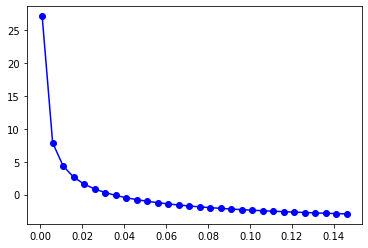

In [ ]:
y=np.arange(0.001, 0.15, 0.005)
plt.plot(y,g(y),'o-b');

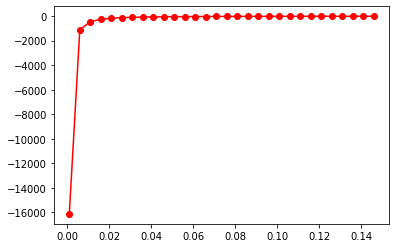

In [ ]:
plt.plot(y,gprime(y),'o-r');

In [ ]:
f0=randint(1,10)/1000 #Palpite inicial (numero aleatorio)
tolerancia=1.00e-08
print('f0 = ',f0)

f0 =  0.005


In [ ]:
delta=1
f_lst=[]
g_lst=[]
gprime_lst=[]
guess=f0

while (delta > tolerancia):
    f = guess-((g(guess))/(gprime(guess)))
    delta = abs(f-guess)
    f_lst.append(f)
    g_lst.append(g(f))
    gprime_lst.append(gprime(f))
    guess=f
results = pd.DataFrame(list(zip(f_lst, g_lst, gprime_lst)), 
               columns =['fi', 'g(f)','g\'(f)']) 
print(results)

         fi          g(f)       g'(f)
0  0.011240  4.240942e+00 -437.627541
1  0.020931  1.604926e+00 -173.235146
2  0.030196  3.888261e-01 -100.307980
3  0.034072  3.365095e-02  -83.773894
4  0.034474  2.929830e-04  -82.322196
5  0.034477  2.255432e-08  -82.309522
6  0.034477  0.000000e+00  -82.309521


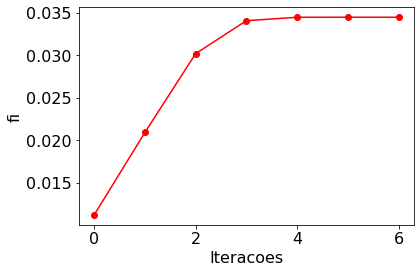

In [ ]:
plt.rcParams.update({'font.size': 16})
plt.figure(1)
plt.plot(range(0,len(f_lst)), f_lst, 'o-r')
plt.xlabel('Iteracoes')
plt.ylabel('fi')
plt.show()

In [ ]:
iterMax=30
f2=np.zeros(iterMax)
for i in range(1,iterMax):
    f2[0]=f0-((g(f0))/(gprime(f0)))
    f2[i]=f2[i-1]-((g(f2[i-1]))/(gprime(f2[i-1])))
    tol=f2[i]-f2[i-1]
    if tol < tolerancia:
        indice = i
        break 

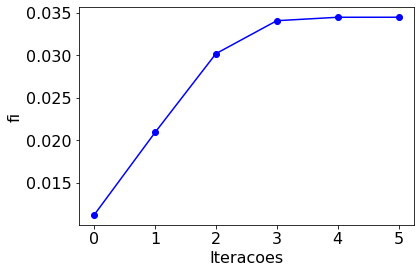

In [ ]:
plt.figure(2)
plt.plot(range(0,indice),f2[0:indice], 'o-b')
plt.xlabel("Iteracoes")
plt.ylabel("fi")
plt.show()

In [ ]:
from scipy import optimize

In [ ]:
(f3,results3) = optimize.newton(g, f0,gprime,full_output=True)
print(results3)

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 7
           root: 0.03447709196136201


In [ ]:
print('O valor de f obtido pelo Método 1 Implementado é: f=', round(f_lst[-1],4)) 
print('O valor de f obtido pelo Método 2 Implementado é: f=', round(f2[indice],4)) 
print('O valor de f obtido pela função newton do módudo optimize do Scipy é: f=', round(f3,4))


O valor de f obtido pelo Método 1 Implementado é: f= 0.0345
O valor de f obtido pelo Método 2 Implementado é: f= 0.0345
O valor de f obtido pela função newton do módudo optimize do Scipy é: f= 0.0345
